In [1]:
from clickhouse_driver import Client
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
db = Client(
    host=os.getenv('CLICKHOUSE_HOST'),
    port=int(os.getenv('CLICKHOUSE_PORT')),
    user=os.getenv('CLICKHOUSE_USER'),
    password=os.getenv('CLICKHOUSE_PASSWORD')
)

## 3.1 Blocks with Highest Fees

In [3]:
max_fees_blocks = db.execute('SELECT block_id, block_timestamp, total_fees  FROM solana.block_metrics order by total_fees desc limit 10')
df = pd.DataFrame(max_fees_blocks, columns=['block_id', 'block_timestamp', 'total_fees'])

In [4]:
df

,block_id,block_timestamp,total_fees
0,339983340,2025-05-14 11:02:41,1609548134
1,339983776,2025-05-14 11:05:38,1232932111
2,339983860,2025-05-14 11:06:11,734046956
3,339983773,2025-05-14 11:05:36,671582612
4,339983663,2025-05-14 11:04:51,661133504
5,339983665,2025-05-14 11:04:52,536250137
6,339983859,2025-05-14 11:06:10,482607857
7,339983349,2025-05-14 11:02:44,449409944
8,339983615,2025-05-14 11:04:32,437362647
9,339983108,2025-05-14 11:01:09,422465551


## 3.2 Plot Compute Units Over Time

In [5]:
compute_units_over_time = db.execute('SELECT block_timestamp, total_compute  FROM solana.block_metrics order by block_timestamp')
df_compute_units_over_time = pd.DataFrame(compute_units_over_time, columns=['block_timestamp', 'total_compute'])

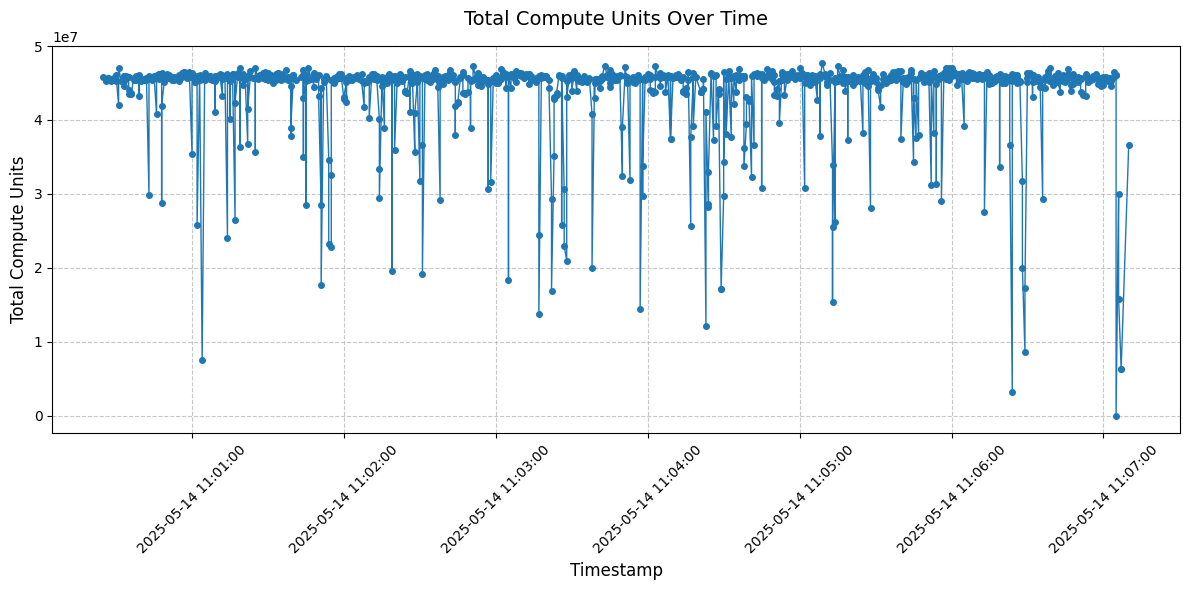

In [6]:



# Create figure and axis
plt.figure(figsize=(12, 6))

# Convert block_timestamp to datetime if it's not already
df_compute_units_over_time['block_timestamp'] = pd.to_datetime(df_compute_units_over_time['block_timestamp'])

# Create the plot
plt.plot(df_compute_units_over_time['block_timestamp'], 
         df_compute_units_over_time['total_compute'], 
         marker='o', 
         linestyle='-', 
         linewidth=1, 
         markersize=4)

# Customize the plot
plt.title('Total Compute Units Over Time', fontsize=14, pad=15)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Total Compute Units', fontsize=12)

# Format x-axis to show full datetime
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()